# Project: Wrangling and Analyze Data

In [1]:
#I am going to import all necessary librairies here

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import requests
import tweepy
from PIL import Image
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
from urlextract import URLExtract
import requests
from io import BytesIO
#import wptools


## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
dataset1 = pd.read_csv('C:\\Users\\michèle_nkuimi\\Downloads\\project4-db\\twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:

#from io import BytesIO
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image-predictions.tsv', mode='wb') as f:
        f.write(r.content)
#dataset2 = pd.read_csv('image-predictions.tsv')
dataset2 = pd.read_csv('image-predictions.tsv', delimiter='\t')

#saving our data
dataset2.to_csv('image-predictions.csv', index=False)
dataset2.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
#consumer_key ='84Yc4Q0wzn05J------'
#consumer_secret ='Jc4NrdSc0OFI76rW-------L'
#access_token = '1469382716-CnmBJh5--------'
#access_token_secret = 'EWWSGjRln8ELmnVBETk5Yi----'
#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_token_secret)

#api = tweepy.API(auth)

#public_tweets = api.home_timeline()
#for tweet in public_tweets:
 #   print(tweet.text)

In [5]:

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = dataset1.tweet_id.values
len(tweet_ids)
'''
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        #except tweepy.error.TweepError as e:   
        except tweepy.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict) '''

'\n# Query Twitter\'s API for JSON data for each tweet ID in the Twitter archive\ncount = 0\nfails_dict = {}\nstart = timer()\n# Save each tweet\'s returned JSON as a new line in a .txt file\nwith open(\'tweet_json.txt\', \'w\') as outfile:\n    # This loop will likely take 20-30 minutes to run because of Twitter\'s rate limit\n    for tweet_id in tweet_ids:\n        count += 1\n        print(str(count) + ": " + str(tweet_id))\n        try:\n            tweet = api.get_status(tweet_id, tweet_mode=\'extended\')\n            print("Success")\n            json.dump(tweet._json, outfile)\n            outfile.write(\'\n\')\n        #except tweepy.error.TweepError as e:   \n        except tweepy.TweepyException as e:\n            print("Fail")\n            fails_dict[tweet_id] = e\n            pass\nend = timer()\nprint(end - start)\nprint(fails_dict) '

Recently Twitter updated their developer options, where they introduced a new Elevated access level. It looks like without 
elevated access, I cannot use tweepy's.API() method.

Since I cannot twitter API, I may use tweet_json.txt files given at project lesson.

In [6]:
dataset3 = pd.DataFrame(columns=['tweet_id','retweet_count','favorite_count'])
with open('C:\\Users\\michèle_nkuimi\\Downloads\\project4-db\\tweet_json.txt', 'r') as file:
    for line in file:
        data =json.loads(line)
        #keys = data.keys()
        tweet_id = data.get('id')
        retweet_count = data.get('retweet_count')
        favorite_count = data.get('favorite_count')
        dataset3=dataset3.append({'tweet_id': tweet_id, 
                                  'retweet_count':retweet_count, 
                                  'favorite_count':favorite_count},ignore_index=True)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [7]:
#Assessing the first dataset
dataset1.info()
dataset1.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [8]:
dataset2.info() 
dataset2.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [9]:
dataset3.info() 
dataset3.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null object
favorite_count    2354 non-null object
dtypes: object(3)
memory usage: 55.2+ KB


,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [10]:
#checking duplicated rows table1
print(dataset1.duplicated().sum())

0


In [11]:
#checking duplicated rows table 2
print(dataset2.duplicated().sum())

0


In [12]:
#checking duplicated rows table3
print(dataset3.duplicated().sum())

0


In [13]:
dataset1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [14]:
dataset2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [15]:
dataset3.describe()

,tweet_id,retweet_count,favorite_count
count,2354,2354,2354
unique,2354,1724,2007
top,667495797102141441,3652,0
freq,1,5,179


### Quality issues

**Table: dataset1**

0. Retweets are not relevant for our analysis. When we remove retweets, we need to drop de concerned columns(in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)

1. Missing values in a non relevant column(expanded_urls)

2. Nulls represented as 'None' in name column 

3. Inconsistent name format(full name sometimes, abbreviations like a or an other times and also lower case) 

4. Erroneous datatypes timestamp column

5. Min rating_dominator = 0 and max= 170 

6. Messy source column 

7. Messy text column in dataset1


**Table: dataset2**

8. Inconsistent used of first letters in p1, p2 and p3 

9. Column img_num contains values from 1 to 4 but one url is shown in the table


### Tidiness issues

10. 'Doggo', 'floofer', 'pupper', 'puppo' look like pet's characteristics in terms size, age or affectionate terms

11. Timestamp column contains more than one information

12. Dataset1, dataset2 and dataset3 look like pieces of one big table.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [16]:
# Make copies of original pieces of data
dataset1_new = dataset1.copy()
dataset2_new = dataset2.copy()
dataset3_new = dataset3.copy()


## Issue 0:
Retweets are not relevant for our analysis. We only want original rating(no retweet) that have images.

#### Define:
The solution is to remove theretweets. It will be done by removing all rows that have values (not blank or non-null) in columns 'retweeted_status_id', 'retweeted_status_user_id', and 'retweeted_status_timestamp'.

#### Code 

In [17]:
dataset1_new = dataset1_new[dataset1_new.retweeted_status_id.isnull()]
dataset1_new = dataset1_new[dataset1_new.retweeted_status_user_id.isnull()]
dataset1_new= dataset1_new[dataset1_new.retweeted_status_timestamp.isnull()]

In [18]:
#deleting the columns
dataset1_new.drop('retweeted_status_id', axis=1,inplace=True)

In [19]:
dataset1_new.drop('retweeted_status_timestamp', axis=1, inplace=True)

In [20]:
dataset1_new.drop('retweeted_status_user_id',axis=1, inplace=True)

#### Test

In [21]:
dataset1_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB


### Issue 1:
Additionally, the column "expanded_urls" seems to be a bad copy of the column "source"; So I will drop it as well.

#### Define:
Since all 5 columns have more than half of the rows as null, I have decided to drop the entire columns.

#### Code

In [22]:
dataset1_new = dataset1_new.drop(columns=['expanded_urls'])


#### Test

In [23]:
dataset1_new.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


### Issue 2:
Nulls represented as 'None' in name column 

#### Define
Change 'None' to 'Unknown with .replace(). The purspose of using "Unknown" instead of "NaN" is to preserve the variance in case we need it later.


#### Code

In [24]:
dataset1_new.name = dataset1_new.name.replace('None', 'Unknown')


#### Test

In [25]:
#dataset1_new
df = dataset1_new[dataset1_new['name'] == 'None']
len(df)

0

### Issue 3:
Inconsistent name format(name sometimes, abbreviations like a or an other times and also lower case) 

#### Define
Checking and replacing the values starting with lower case with 'Unknown'.

#### Code

In [26]:
# step1: checking names starting with lowwr case
my_list = [y for x in dataset1_new['name'] for y in x.split() if y.islower()]
print (my_list)
len(my_list)

['such', 'a', 'quite', 'quite', 'not', 'one', 'incredibly', 'a', 'a', 'very', 'my', 'one', 'not', 'his', 'one', 'a', 'a', 'a', 'an', 'very', 'actually', 'a', 'just', 'getting', 'mad', 'very', 'this', 'unacceptable', 'all', 'a', 'old', 'a', 'infuriating', 'a', 'a', 'a', 'an', 'a', 'a', 'very', 'getting', 'just', 'a', 'the', 'the', 'actually', 'by', 'a', 'officially', 'a', 'the', 'the', 'a', 'a', 'a', 'a', 'life', 'a', 'one', 'a', 'a', 'a', 'light', 'just', 'space', 'a', 'the', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'an', 'a', 'the', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'quite', 'a', 'an', 'a', 'an', 'the', 'the', 'a', 'a', 'an', 'a', 'a', 'a', 'a']


104

In [27]:
#We have 109 values which do not look like dog's name.
#step2: replacing names starting with lower case
dataset1_new.loc[dataset1_new.name.str.islower().fillna(False),'name']= 'Unknown'

#### Test

In [28]:
my_list = [y for x in dataset1_new['name'] for y in x.split() if y.islower()]
print (my_list)
len(my_list)

[]


0

In [29]:
#we can also check names with value_counts()
dataset1_new.name.value_counts()

Unknown     784
Charlie      11
Lucy         11
Oliver       10
Cooper       10
Tucker        9
Penny         9
Winston       8
Lola          8
Sadie         8
Toby          7
Daisy         7
Bella         6
Bailey        6
Bo            6
Koda          6
Stanley       6
Oscar         6
Jax           6
Buddy         5
Leo           5
Dave          5
Louis         5
Chester       5
Milo          5
Scout         5
Rusty         5
Bentley       5
Sophie        4
Dexter        4
           ... 
Arlen         1
Bluebert      1
Rolf          1
Corey         1
Rudy          1
Sky           1
Fiji          1
Angel         1
Klein         1
Nollie        1
Crouton       1
Harper        1
Eleanor       1
Sora          1
Norman        1
William       1
Emmy          1
Malikai       1
Wishes        1
Rufio         1
Danny         1
Buckley       1
Creg          1
Finnegus      1
Superpup      1
Davey         1
Farfle        1
Einstein      1
Gin           1
Walker        1
Name: name, Length: 931,

### Issue 4 & 11: 
Erroneous datatypes timestamp column. Column timestamp could be used differently.

#### Define
Converting timestamp to datetime using pd.to_datetime() method.  It is also needed to make new columns with information such as 'year', 'month' and 'day'. After we haved extracted year, month and day,  column timestamp may be deleted.

#### Code

In [30]:
dataset1_new.timestamp = pd.to_datetime(dataset1_new.timestamp)

In [31]:
#dataset1_new['year'] = pd.DatetimeIndex(dataset1_new['timestamp'])
dataset1_new['year'] = dataset1_new['timestamp'].dt.year
dataset1_new['month'] = dataset1_new['timestamp'].dt.month_name()
dataset1_new['day'] = dataset1_new['timestamp'].dt.day_name()

In [32]:
# we may now delete the colum 'timestamp'
del dataset1_new['timestamp']

#### Test


In [33]:
dataset1_new.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month,day
0,892420643555336193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None,2017,August,Tuesday
1,892177421306343426,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None,2017,August,Tuesday
2,891815181378084864,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None,2017,July,Monday
3,891689557279858688,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None,2017,July,Sunday
4,891327558926688256,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None,2017,July,Saturday


### Issue 5: 
Min rating_dominator = 0 and Max rating_denominator = 170.
I quote: "These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc". 

#### Define
I will drop all rows with a denominator which is not 10. As far as numerator is concerned, a max value of 20 seems resonable. I will therefore drop all rows with a numerator which is more than 20.

#### Code

In [34]:
dataset1_new[dataset1_new['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month,day
313,835246439529840640,8.352460e+17,2.625958e+07,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,960,0,Unknown,None,None,None,None,2017,February,Friday
342,832088576586297345,8.320875e+17,3.058208e+07,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,11,15,Unknown,None,None,None,None,2017,February,Thursday
433,820690176645140481,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,84,70,Unknown,None,None,None,None,2017,January,Sunday
516,810984652412424192,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7,Sam,None,None,None,None,2016,December,Monday
902,758467244762497024,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,165,150,Unknown,None,None,None,None,2016,July,Thursday
1068,740373189193256964,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",9,11,Unknown,None,None,None,None,2016,June,Wednesday
1120,731156023742988288,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,204,170,Unknown,None,None,None,None,2016,May,Friday
1165,722974582966214656,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,4,20,Unknown,None,None,None,None,2016,April,Thursday
1202,716439118184652801,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,50,50,Bluebert,None,None,None,None,2016,April,Sunday
1228,713900603437621249,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,99,90,Unknown,None,None,None,None,2016,March,Sunday


In [35]:
#first testing the number of values
df2 = dataset1_new[dataset1_new['rating_denominator'] != 10]
len(df2)


22

In [36]:
df3 = dataset1_new[dataset1_new['rating_numerator'] > 20]
len(df3)

23

In [37]:
#Then droping these values
dataset1_new.drop(dataset1_new.loc[dataset1_new['rating_denominator']!=10].index, inplace=True)

In [38]:
#Then droping these values
dataset1_new.drop(dataset1_new.loc[dataset1_new['rating_numerator'] > 20].index, inplace=True)

#### Test

In [39]:
df2 = dataset1_new[dataset1_new['rating_denominator'] != 10]
len(df2)


0

In [40]:
df3 = dataset1_new[dataset1_new['rating_numerator'] > 20]
len(df3)

0

In [41]:
len(dataset1_new) 

2145

### Issue 6: 
 Messy source "column" in dataset1: It looks too busy. 

#### Define #6
We will be using Regular Expression to extract only the URL's from "source" column.

### Code #6

In [42]:
extractor = URLExtract()
dataset1_new.source = dataset1_new.source.apply(extractor.find_urls)

#### Test #6

In [43]:
pd.set_option('display.max_colwidth', -1)
dataset1_new.head(10) 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month,day
0,892420643555336193,NaN,NaN,[http://twitter.com/download/iphone],This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,None,None,None,None,2017,August,Tuesday
1,892177421306343426,NaN,NaN,[http://twitter.com/download/iphone],"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,None,None,None,None,2017,August,Tuesday
2,891815181378084864,NaN,NaN,[http://twitter.com/download/iphone],This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,None,None,None,None,2017,July,Monday
3,891689557279858688,NaN,NaN,[http://twitter.com/download/iphone],This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,None,None,None,None,2017,July,Sunday
4,891327558926688256,NaN,NaN,[http://twitter.com/download/iphone],"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,None,None,None,None,2017,July,Saturday
5,891087950875897856,NaN,NaN,[http://twitter.com/download/iphone],Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,13,10,Unknown,None,None,None,None,2017,July,Saturday
6,890971913173991426,NaN,NaN,[http://twitter.com/download/iphone],Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,13,10,Jax,None,None,None,None,2017,July,Friday
7,890729181411237888,NaN,NaN,[http://twitter.com/download/iphone],When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,13,10,Unknown,None,None,None,None,2017,July,Friday
8,890609185150312448,NaN,NaN,[http://twitter.com/download/iphone],This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,13,10,Zoey,None,None,None,None,2017,July,Thursday
9,890240255349198849,NaN,NaN,[http://twitter.com/download/iphone],This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,14,10,Cassie,doggo,None,None,None,2017,July,Wednesday


### Issue 7: 
 Messy source "text" in dataset1: It contains useless information and information we already have in numerator en denominator

### Define 
 These comun contains useless information and information we already have in numerator en denominator.  we will be using .replace methods to remove the parts that are not needed

In [44]:
#dataset1_new.text= dataset1_new.text.str.replace(r's*https?://S+(s+|$)', '').str.strip() 
dataset1_new.text= dataset1_new.text.str.replace('\d+', '')
dataset1_new['text']= dataset1_new['text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ').str.strip()
dataset1_new.text= dataset1_new.text.str.replace('/', '')

### Test 

In [45]:
pd.set_option('display.max_colwidth', -1) 
dataset1_new.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month,day
0,892420643555336193,NaN,NaN,[http://twitter.com/download/iphone],This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut.,13,10,Phineas,None,None,None,None,2017,August,Tuesday
1,892177421306343426,NaN,NaN,[http://twitter.com/download/iphone],"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit.",13,10,Tilly,None,None,None,None,2017,August,Tuesday
2,891815181378084864,NaN,NaN,[http://twitter.com/download/iphone],This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike.,12,10,Archie,None,None,None,None,2017,July,Monday
3,891689557279858688,NaN,NaN,[http://twitter.com/download/iphone],This is Darla. She commenced a snooze mid meal. happens to the best of us,13,10,Darla,None,None,None,None,2017,July,Sunday
4,891327558926688256,NaN,NaN,[http://twitter.com/download/iphone],"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. #BarkWeek",12,10,Franklin,None,None,None,None,2017,July,Saturday
5,891087950875897856,NaN,NaN,[http://twitter.com/download/iphone],Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. (IG: tucker_marlo) #BarkWeek,13,10,Unknown,None,None,None,None,2017,July,Saturday
6,890971913173991426,NaN,NaN,[http://twitter.com/download/iphone],Meet Jax. He enjoys ice cream so much he gets nervous around it. help Jax enjoy more things by clicking below,13,10,Jax,None,None,None,None,2017,July,Friday
7,890729181411237888,NaN,NaN,[http://twitter.com/download/iphone],When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy.,13,10,Unknown,None,None,None,None,2017,July,Friday
8,890609185150312448,NaN,NaN,[http://twitter.com/download/iphone],This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. #BarkWeek,13,10,Zoey,None,None,None,None,2017,July,Thursday
9,890240255349198849,NaN,NaN,[http://twitter.com/download/iphone],This is Cassie. She is a college pup. Studying international doggo communication and stick theory. so elegant much sophisticate,14,10,Cassie,doggo,None,None,None,2017,July,Wednesday


### Issue 8 & 9: 
Inconsistent used of first letters in p1, p2 and p3. Moreover,column img_num contains values from 1 to 4 but one url is shown in the table. More over, columns 'in_reply_to_status_id' and 'in_reply_to_user_id'seem to be useless and they also contain many missing values. I will therefore also drop them.	


#### Define

The first letters of values in p1, p2, p3 columns start with either lower case or uppercase. We are going to capitalize the first letter using.capitalize() method.

The purpose of column img_num is unclear because it contains integer values, which implies the number of images but, only one url is provide. We may drop this column.

#### Code

In [46]:
dataset2_new.p1 =dataset2_new.p1.str.capitalize()
dataset2_new.p2 =dataset2_new.p2.str.capitalize()
dataset2_new.p3 =dataset2_new.p3.str.capitalize()

In [47]:
del dataset2_new['img_num']

In [48]:
del dataset1_new['in_reply_to_status_id']
del dataset1_new['in_reply_to_user_id']

#### Test

In [49]:
dataset1_new.head()

,tweet_id,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month,day
0,892420643555336193,[http://twitter.com/download/iphone],This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut.,13,10,Phineas,None,None,None,None,2017,August,Tuesday
1,892177421306343426,[http://twitter.com/download/iphone],"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit.",13,10,Tilly,None,None,None,None,2017,August,Tuesday
2,891815181378084864,[http://twitter.com/download/iphone],This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike.,12,10,Archie,None,None,None,None,2017,July,Monday
3,891689557279858688,[http://twitter.com/download/iphone],This is Darla. She commenced a snooze mid meal. happens to the best of us,13,10,Darla,None,None,None,None,2017,July,Sunday
4,891327558926688256,[http://twitter.com/download/iphone],"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. #BarkWeek",12,10,Franklin,None,None,None,None,2017,July,Saturday


In [50]:
dataset2_new.head(15)

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_swiss_mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,Box_turtle,0.933012,False,Mud_turtle,0.045885,False,Terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,Chow,0.692517,True,Tibetan_mastiff,0.058279,True,Fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,Shopping_cart,0.962465,False,Shopping_basket,0.014594,False,Golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,Miniature_poodle,0.201493,True,Komondor,0.192305,True,Soft-coated_wheaten_terrier,0.082086,True


### Issue 10: 
'Doggo', 'floofer', 'pupper', 'puppo' look like pet's characteristics in terms of size and age or are just affectionate terms.

#### Define

These four columns should be merged in one column using + method.

#### Code

In [51]:
'''# First we should replace "None" values of these rows with " "
rows = ['doggo', 'pupper', 'floofer', 'puppo']
for row in rows:
    dataset1_new[row]= dataset1_new[row]. replace('None', ' ')
#concatenate    
dataset1_new['dog_feat'] = dataset1_new['doggo'] + dataset1_new['pupper'] + dataset1_new['floofer'] + dataset1_new['puppo']
'''
dog_feat = ['doggo', 'pupper', 'floofer', 'puppo']
dataset1_new[dog_feat]=dataset1_new[dog_feat].replace('None',np.nan)
dataset1_new['dog_feat']=dataset1_new[dog_feat].apply(lambda x: ','.join(x[x.notnull()]),axis=1)
dataset1_new.dog_feat.value_counts()

# we should drop the old columns
dataset1_new = dataset1_new.drop(columns=['doggo',  'pupper','floofer', 'puppo'])


### Test

In [52]:
dataset1_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2145 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2145 non-null int64
source                2145 non-null object
text                  2145 non-null object
rating_numerator      2145 non-null int64
rating_denominator    2145 non-null int64
name                  2145 non-null object
year                  2145 non-null int64
month                 2145 non-null object
day                   2145 non-null object
dog_feat              2145 non-null object
dtypes: int64(4), object(6)
memory usage: 184.3+ KB


### Issue 12: 
Because the three tables contain information that could be in one table, they should be merged. It is done using pd.merge() method.

In [53]:
#datasets_merged  = dataset1_new.merge(dataset2_new, left_index=True, right_index=True,
                 #how='outer', suffixes=('', '_y'))
datasets_merged = pd.merge(dataset1_new, dataset2_new, 
                           how='inner', 
                           on=None, 
                           left_on=None, 
                           right_on=None, 
                           left_index=False, 
                           right_index=False, 
                           indicator=False,
                           sort=True,
                           suffixes=('_x', '_y'), 
                           validate=None)

In [54]:
datasets_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 20 columns):
tweet_id              1971 non-null int64
source                1971 non-null object
text                  1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
year                  1971 non-null int64
month                 1971 non-null object
day                   1971 non-null object
dog_feat              1971 non-null object
jpg_url               1971 non-null object
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non-null bool
dtypes: bool(3), float64(3), int64(4), o

In [55]:
datasets_all_merged = pd.merge(datasets_merged, dataset3_new, 
                           how='inner', 
                           on=None, 
                           left_on=None, 
                           right_on=None, 
                           left_index=False, 
                           right_index=False, 
                           indicator=False,
                           sort=True,
                           suffixes=('_x', '_y'), 
                           validate=None)

In [56]:
datasets_all_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 22 columns):
tweet_id              1971 non-null object
source                1971 non-null object
text                  1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
year                  1971 non-null int64
month                 1971 non-null object
day                   1971 non-null object
dog_feat              1971 non-null object
jpg_url               1971 non-null object
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non-null bool
retweet_count         1971 non-null obj

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [57]:
datasets_all_merged.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [58]:
final_dataset= pd.read_csv('twitter_archive_master.csv')

In [59]:
final_dataset.sample(5)

,tweet_id,source,text,rating_numerator,rating_denominator,name,year,month,day,dog_feat,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
1583,810254108431155201,['http://twitter.com/download/iphone'],"This is Gus. He likes to be close to you, which is good because you want to be close to Gus. would boop then pet",12,10,Gus,2016,December,Saturday,NaN,...,0.292556,True,American_staffordshire_terrier,0.261233,True,Border_terrier,0.062375,True,3901,16380
62,667165590075940865,['http://twitter.com/download/iphone'],This is Churlie. AKA Fetty Woof. Lost eye saving a school bus full of toddlers from a tsunami. Great guy.,10,10,Churlie,2015,November,Thursday,NaN,...,0.140173,True,Rottweiler,0.134094,True,Beagle,0.081900,True,1241,2819
603,680085611152338944,['https://about.twitter.com/products/tweetdeck'],This is by far the most coordinated series of pictures I was sent. Downright impressive in every way. for all,12,10,Unknown,2015,December,Thursday,NaN,...,0.778113,False,Apron,0.095023,False,Wallet,0.049326,False,10034,13959
524,676811746707918848,['http://twitter.com/download/iphone'],Say hello to Penny &amp; Gizmo. They are practicing their caroling. The ambition in the room is tangible. for both,9,10,Penny,2015,December,Tuesday,NaN,...,0.440916,True,Pomeranian,0.345806,True,Cocker_spaniel,0.060331,True,469,1536
1137,733460102733135873,['http://twitter.com/download/iphone'],This is Hermione. Her face is as old as time. Appears fluffy af tho. pretty damn majestic,11,10,Hermione,2016,May,Friday,NaN,...,0.931275,True,Beaver,0.028831,False,Dhole,0.017379,False,1451,4605


In [60]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 22 columns):
tweet_id              1971 non-null int64
source                1971 non-null object
text                  1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
year                  1971 non-null int64
month                 1971 non-null object
day                   1971 non-null object
dog_feat              305 non-null object
jpg_url               1971 non-null object
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non-null bool
retweet_count         1971 non-null int64

In [61]:
final_dataset.describe()

,tweet_id,rating_numerator,rating_denominator,year,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,1.971000e+03,1971.000000,1971.0,1971.000000,1971.000000,1.971000e+03,1.971000e+03,1971.000000,1971.000000
mean,7.360288e+17,10.548960,10.0,2015.846778,0.593893,1.348851e-01,6.019792e-02,2767.880771,8921.838153
std,6.768326e+16,2.185325,0.0,0.700879,0.272043,1.008800e-01,5.081204e-02,4687.479281,12260.445319
min,6.660209e+17,0.000000,10.0,2015.000000,0.044333,1.011300e-08,1.740170e-10,16.000000,81.000000
25%,6.757900e+17,10.000000,10.0,2015.000000,0.361531,5.409535e-02,1.605405e-02,622.500000,1956.500000
50%,7.083565e+17,11.000000,10.0,2016.000000,0.587764,1.186220e-01,4.948690e-02,1350.000000,4134.000000
75%,7.882952e+17,12.000000,10.0,2016.000000,0.844583,1.957615e-01,9.164355e-02,3222.000000,11347.500000
max,8.924206e+17,14.000000,10.0,2017.000000,1.000000,4.880140e-01,2.710420e-01,79515.000000,132810.000000


### Visualization

Visualizing the data will help us to find Insights in Data

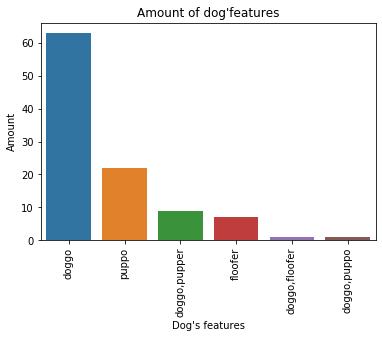

<Figure size 1440x576 with 0 Axes>

In [62]:
ax = sns.barplot(x = final_dataset['dog_feat'].value_counts()[1:10].index,
            y =final_dataset['dog_feat'].value_counts()[1:10],
            data = final_dataset);
plt.xlabel("Dog's features");
plt.ylabel("Amount");
plt.title("Amount of dog'features")
plt.figure(figsize = (20,8));
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 10);

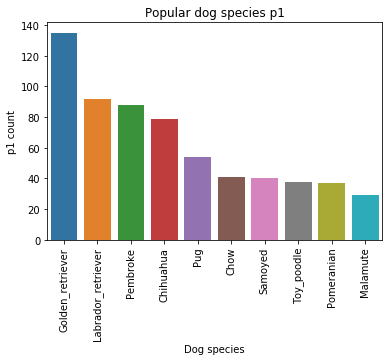

<Figure size 1440x576 with 0 Axes>

In [63]:
ax = sns.barplot(x = final_dataset['p1'].value_counts()[0:10].index,
            y =final_dataset['p1'].value_counts()[0:10],
            data = final_dataset);
plt.xlabel("Dog species");
plt.ylabel("p1 count");
plt.title("Popular dog species p1")
plt.figure(figsize = (20,8));
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 10);

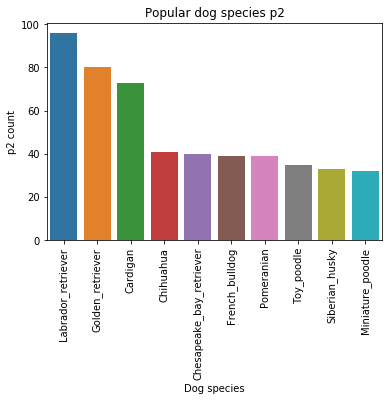

<Figure size 1440x576 with 0 Axes>

In [64]:
ax = sns.barplot(x = final_dataset['p2'].value_counts()[0:10].index,
            y =final_dataset['p2'].value_counts()[0:10],
            data = final_dataset);
plt.xlabel("Dog species");
plt.ylabel("p2 count");
plt.title("Popular dog species p2")
plt.figure(figsize = (20,8));
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 10);

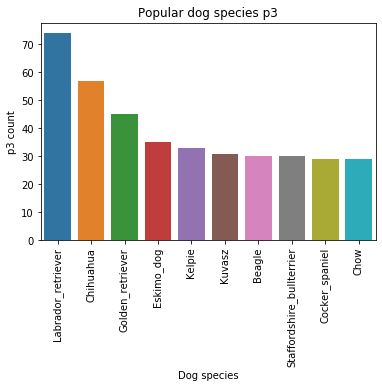

<Figure size 1440x576 with 0 Axes>

In [65]:
ax = sns.barplot(x = final_dataset['p3'].value_counts()[0:10].index,
            y =final_dataset['p3'].value_counts()[0:10],
            data = final_dataset);
plt.xlabel("Dog species");
plt.ylabel("p3 count");
plt.title("Popular dog species p3")
plt.figure(figsize = (20,8));
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 10);

In [66]:
final_dataset.groupby("year")['tweet_id'].count().sort_values()

year
2017    356
2015    658
2016    957
Name: tweet_id, dtype: int64

In [67]:
final_dataset.groupby("month")['tweet_id'].count().sort_values()

month
August       61 
September    62 
October      64 
April        93 
May          99 
June         124
July         135
March        165
February     173
January      231
November     347
December     417
Name: tweet_id, dtype: int64

In [68]:
final_dataset.groupby("day")['tweet_id'].count().sort_values()

day
Sunday       250
Saturday     252
Friday       278
Thursday     281
Tuesday      292
Wednesday    295
Monday       323
Name: tweet_id, dtype: int64

Text(0, 0.5, 'favorite_count')

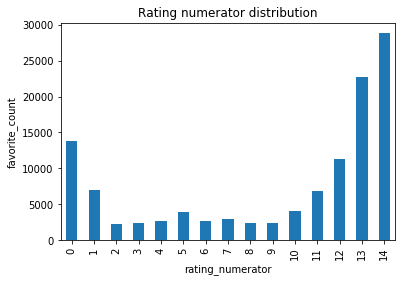

In [69]:
final_dataset.groupby('rating_numerator')['favorite_count'].mean().plot(kind='bar',
                                                                title = 'Rating numerator distribution')
plt.xlabel('rating_numerator')
plt.ylabel('favorite_count')

### Insights:
1. The final dataset has less columns and rows; it contains neither duplicated nor missing values: we now have a clean dataset.

2. "Pupper" is the favourite dog feature(highest count tweets).

3. Year 2016 was a good year for dog tweets,  most tweets was in December and dog lovers have a clear preference for Mondays.

4. p2 and p3 both identified the majority of dogs as labrodor_predictor; while for p1 it was golden_retriever

5. Favorite_cout tweets also have high rating numerator.

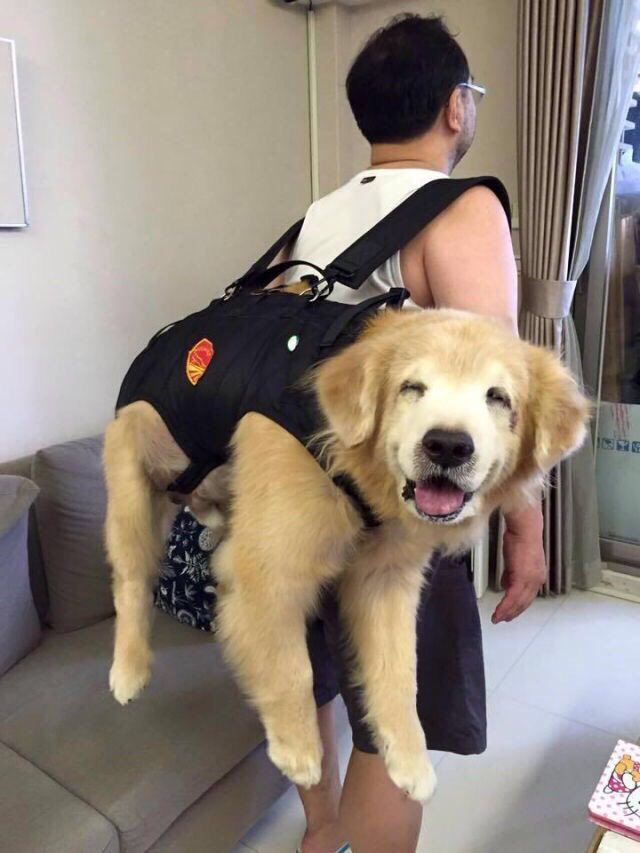

In [70]:
# What kinds of images do we have anyway?
link=final_dataset.jpg_url[10]
r = requests.get(link)
Image.open(BytesIO(r.content))